<a href="https://colab.research.google.com/github/benndip/image-classification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: This program classifies Images

In [ ]:
#Import the libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils.np_utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [59]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
#Look at the data types of the variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
#Get the shape of the arrays
print('x_train shape::', x_train.shape)
print('y_train shape::', y_train.shape)
print('x_test shape::', x_test.shape)
print('y_test shape::', y_test.shape)

x_train shape:: (50000, 32, 32, 3)
y_train shape:: (50000, 1)
x_test shape:: (10000, 32, 32, 3)
y_test shape:: (10000, 1)


In [ ]:
#Take a look at the first image as an array
index = 0
x_train[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

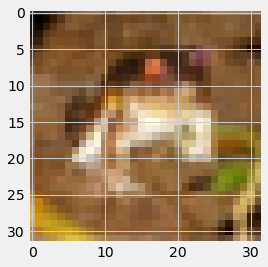

In [ ]:
#Show the image as a picture
img = plt.imshow(x_train[index])

In [ ]:
#Get the image label
print('The image label is: ', y_train[index])

The image label is:  [6]


In [60]:
#Get the image classification
classification = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#print the image class
print('The image class is :', classification[y_train[index][0]])

The image class is : frog


In [ ]:
#Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)


In [ ]:
#print the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
#print the new label of the image/picture above
print('The one hot label is : ', y_train_one_hot[index])

The one hot label is :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
#Normalize the pixels to be values between 0 and 1
x_train = x_train / 255
y_train = y_train / 255

In [ ]:
x_train[index]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
#Create the models architecture
model = Sequential()

#Add the first layer
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))

#Adding a pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Adding another convolution layer
model.add( Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))

#Adding another pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Add a flattening layer
model.add(Flatten())

#Add a layer for 1000 neurons
model.add(Dense(1000,activation = 'relu'))

#Add a dropout layer
model.add(Dropout(0.5))

#Add a layer for 500 neurons
model.add(Dense(500,activation = 'relu'))

#Add a dropout layer
model.add(Dropout(0.5))

#Add a layer for 250 neurons
model.add(Dense(250,activation = 'relu'))

#Add a layer for 10 neurons
model.add(Dense(10,activation = 'softmax'))

#Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train, y_train_one_hot, batch_size=256, epochs = 10, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 73s 364ms/step - loss: 2.0309 - accuracy: 0.2358 - val_loss: 1.6165 - val_accuracy: 0.4084
Epoch 2/10
157/157 [==============================] - 56s 356ms/step - loss: 1.5118 - accuracy: 0.4465 - val_loss: 1.3410 - val_accuracy: 0.5158
Epoch 3/10
157/157 [==============================] - 56s 357ms/step - loss: 1.3305 - accuracy: 0.5129 - val_loss: 1.2770 - val_accuracy: 0.5428
Epoch 4/10
157/157 [==============================] - 56s 357ms/step - loss: 1.2197 - accuracy: 0.5616 - val_loss: 1.1515 - val_accuracy: 0.5922
Epoch 5/10
157/157 [==============================] - 56s 357ms/step - loss: 1.1289 - accuracy: 0.5995 - val_loss: 1.1163 - val_accuracy: 0.5992
Epoch 6/10
157/157 [==============================] - 56s 354ms/step - loss: 1.0683 - accuracy: 0.6181 - val_loss: 1.1024 - val_accuracy: 0.6169
Epoch 7/10
157/157 [==============================] - 56s 355ms/step - loss: 0.9759 - accuracy: 0.6525 - val_loss: 1.1150 - val_ac

In [39]:
#Evaluate the model using the testing set
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 5s 16ms/step - loss: 196.0632 - accuracy: 0.4866


0.48660001158714294

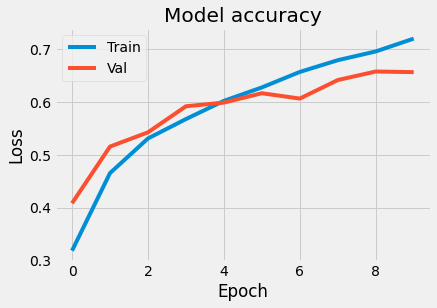

In [43]:
#visualize the models
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train','Val'],loc='upper left')
plt.show()


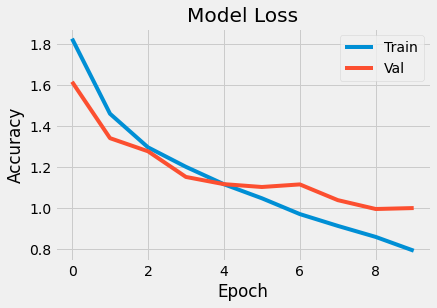

In [44]:
#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train','Val'],loc='upper right')
plt.show()


In [64]:
#Test the model
from google.colab import files
upload = files.upload()

Saving cat2.webp to cat2.webp


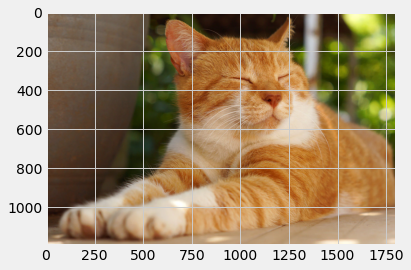

In [65]:
#show the image
new_image = plt.imread('cat2.webp')
img = plt.imshow(new_image)

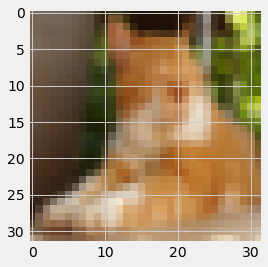

In [66]:
#Resize the image
from skimage.transform import resize
resized_image = resize(new_image,(32,32,3))
img = plt.imshow(resized_image)

In [67]:
#Get the mode'l prediction
predictions = model.predict(np.array([resized_image]))

#Show the predictions
predictions

array([[2.9287802e-03, 3.5797738e-04, 1.3283186e-01, 5.9231299e-01,
        2.5975311e-02, 1.8285537e-01, 9.8820841e-03, 4.8961464e-02,
        2.9217973e-03, 9.7234495e-04]], dtype=float32)

In [68]:
#sort the presictoins from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
#Shoe the sorted labels in order
print(list_index)


[3, 5, 2, 7, 4, 6, 0, 8, 9, 1]


In [69]:
for i in range(5):
  print(classification[list_index[i]] , ':' , round(predictions[0][list_index[i]] * 100, 2), '%' )

cat : 59.23 %
dog : 18.29 %
bird : 13.28 %
horse : 4.9 %
deer : 2.6 %
